## ML Regression Project (XGBoost)

### Project Scenario

### Task 1: Load and Inspect the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("movies.csv")
df

,title,main_genre,belongs_to_collection,budget,revenue,production_companies,vote_average,popularity,runtime,cast_size,crew_size,cast_tr,director_tr,production_company_tr,English,title_length,rel_year,rel_month
0,Central Station,Drama,False,2.9,5.596708,3.0,7.6,4.919716,113.0,19,43,0.000000,0.000000,0.000000,False,14,1998,January
1,Hard Rain,Thriller,False,70.0,19.870567,9.0,5.5,6.363405,97.0,10,82,2361.750386,12.890752,14585.748889,True,8,1998,January
2,Half Baked,Comedy,False,8.0,17.460020,1.0,6.4,7.022548,82.0,12,8,119.943461,44.442512,13181.546450,True,9,1998,January
3,Great Expectations,Comedy,False,25.0,55.494066,2.0,6.4,9.941228,111.0,10,6,726.339145,0.000000,10393.573468,True,17,1998,January
4,Buffalo '66,Romance,False,1.5,2.375097,NaN,7.2,9.167761,110.0,26,13,366.582721,0.000000,NaN,True,10,1998,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,Atomic Blonde,Action,False,30.0,90.007945,5.0,6.1,14.455104,115.0,23,96,5208.358646,0.000000,0.208588,True,12,2017,July
3662,The Emoji Movie,Comedy,False,50.0,66.913939,2.0,5.8,33.694599,86.0,33,46,2120.117991,30.000000,31840.881695,True,13,2017,July
3663,The Dark Tower,Action,False,60.0,71.000000,4.0,5.7,50.903593,95.0,50,199,3767.974906,7.594693,4528.739344,True,12,2017,August
3664,Wind River,Action,False,11.0,184.770205,3.0,7.4,40.796775,111.0,22,18,2159.066587,0.000000,171.539887,True,9,2017,August


In [ ]:
df.info()

-> Some columns have missing values (NaN)

### Column Information

__Labels (Target Variable of Prediction)__

revenue: the movie´s box office revenue in Million USD (MUSD)

__Feature Variables:__

- title: movie title (for information purposes only, not to be used in regression)
- main_genre: the main genre of the movie (e.g. Drama)
- belongs_to_collection: Whether the movie belongs to a collection/franchise (True) or not (False). Example: Star Wars
- budget: the movie´s budget in Million USD (MUSD)
- production_companies: number of involved production companies
- vote_average: Average vote by preview audience. From 1 (very bad) to 10 (excellent)
- popularity: the movie´s popularity measured in google searches, social media posts, etc.
- runtime: runtime of the movie in minutes
- cast_size: number of actors involved
- crew_size: number of crew members involved
- cast_tr: Track Record of the movie´s three main actors (aggregated box-office revenues in MUSD prior to this movie)
- director_tr: Track Record of the movie´s director (aggregated box-office revenues in MUSD prior to this movie)
- production_company_tr: Track Record of the movie´s production company (aggregated box-office revenues in MUSD prior to this movie)
- English: Whether the movie´s original language is English (True) or not (False)
- title_length: number of characters in the movie title
- rel_year: the movie´s year of release
- rel_month: the movie´s month of release

In [ ]:
df.describe()

-> some outliers but no clear data errors.

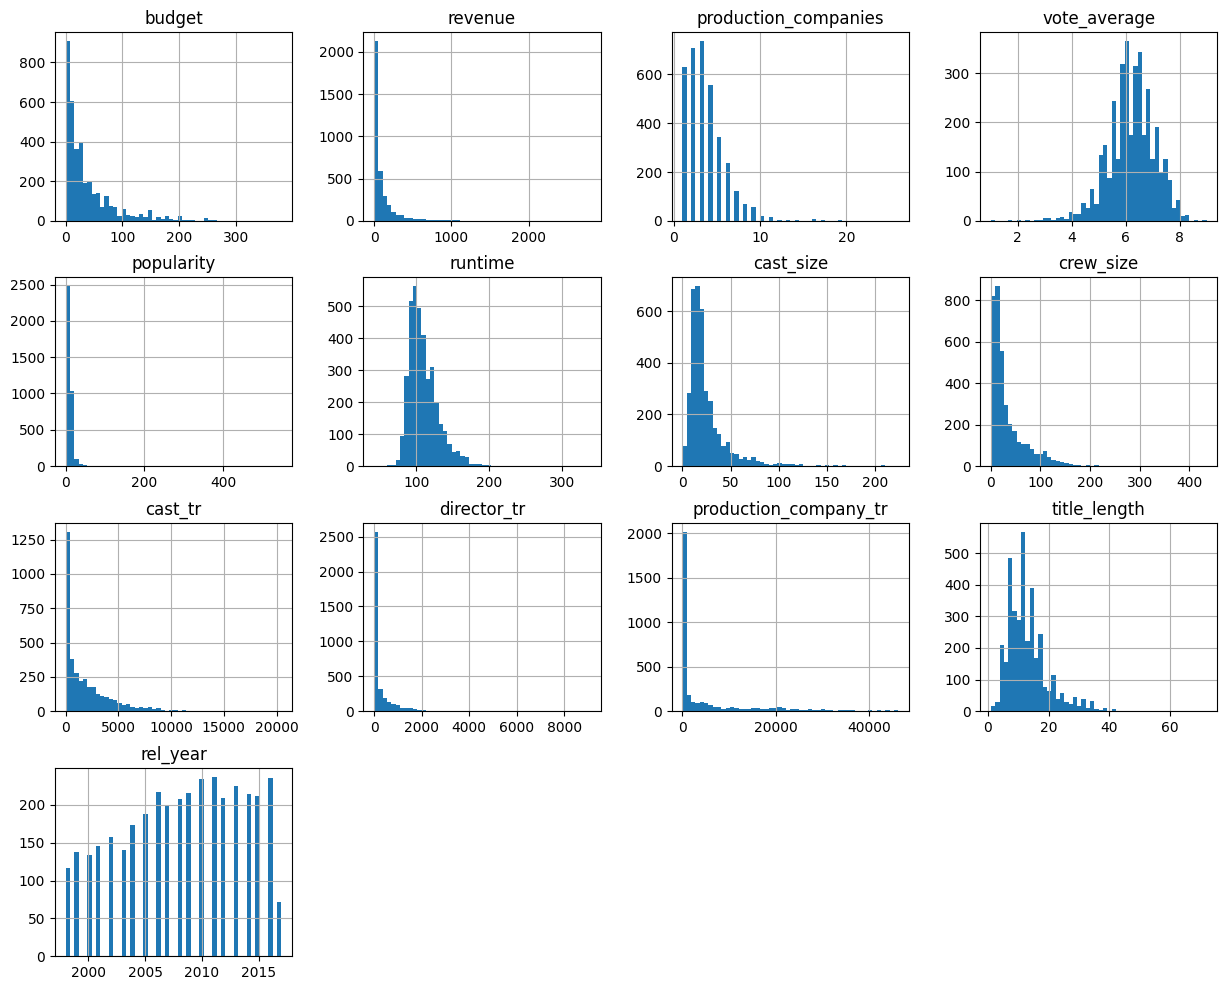

In [3]:
df.hist(figsize = (15, 12), bins = 50)
plt.show()

### Task 2: Split the Dataset into a Training Set and a Test Set

In [4]:
df.drop(columns = "title", inplace = True)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set, test_set = train_test_split(df, test_size = 0.25, shuffle = True, random_state = 42)

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2749 entries, 3325 to 3174
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   main_genre             2744 non-null   object 
 1   belongs_to_collection  2749 non-null   bool   
 2   budget                 2749 non-null   float64
 3   revenue                2749 non-null   float64
 4   production_companies   2633 non-null   float64
 5   vote_average           2745 non-null   float64
 6   popularity             2749 non-null   float64
 7   runtime                2739 non-null   float64
 8   cast_size              2749 non-null   int64  
 9   crew_size              2749 non-null   int64  
 10  cast_tr                2741 non-null   float64
 11  director_tr            2745 non-null   float64
 12  production_company_tr  2633 non-null   float64
 13  English                2749 non-null   bool   
 14  title_length           2749 non-null   int64  
 15  rel_ye

In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 1960 to 2822
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   main_genre             914 non-null    object 
 1   belongs_to_collection  917 non-null    bool   
 2   budget                 917 non-null    float64
 3   revenue                917 non-null    float64
 4   production_companies   888 non-null    float64
 5   vote_average           917 non-null    float64
 6   popularity             917 non-null    float64
 7   runtime                915 non-null    float64
 8   cast_size              917 non-null    int64  
 9   crew_size              917 non-null    int64  
 10  cast_tr                916 non-null    float64
 11  director_tr            916 non-null    float64
 12  production_company_tr  888 non-null    float64
 13  English                917 non-null    bool   
 14  title_length           917 non-null    int64  
 15  rel_yea

### Task 3: Perform an Explanatory Data Analysis (EDA) - Correlations and Regressionplots

In [10]:
corr_matrix = train_set.corr(numeric_only = True)

In [11]:
import seaborn as sns

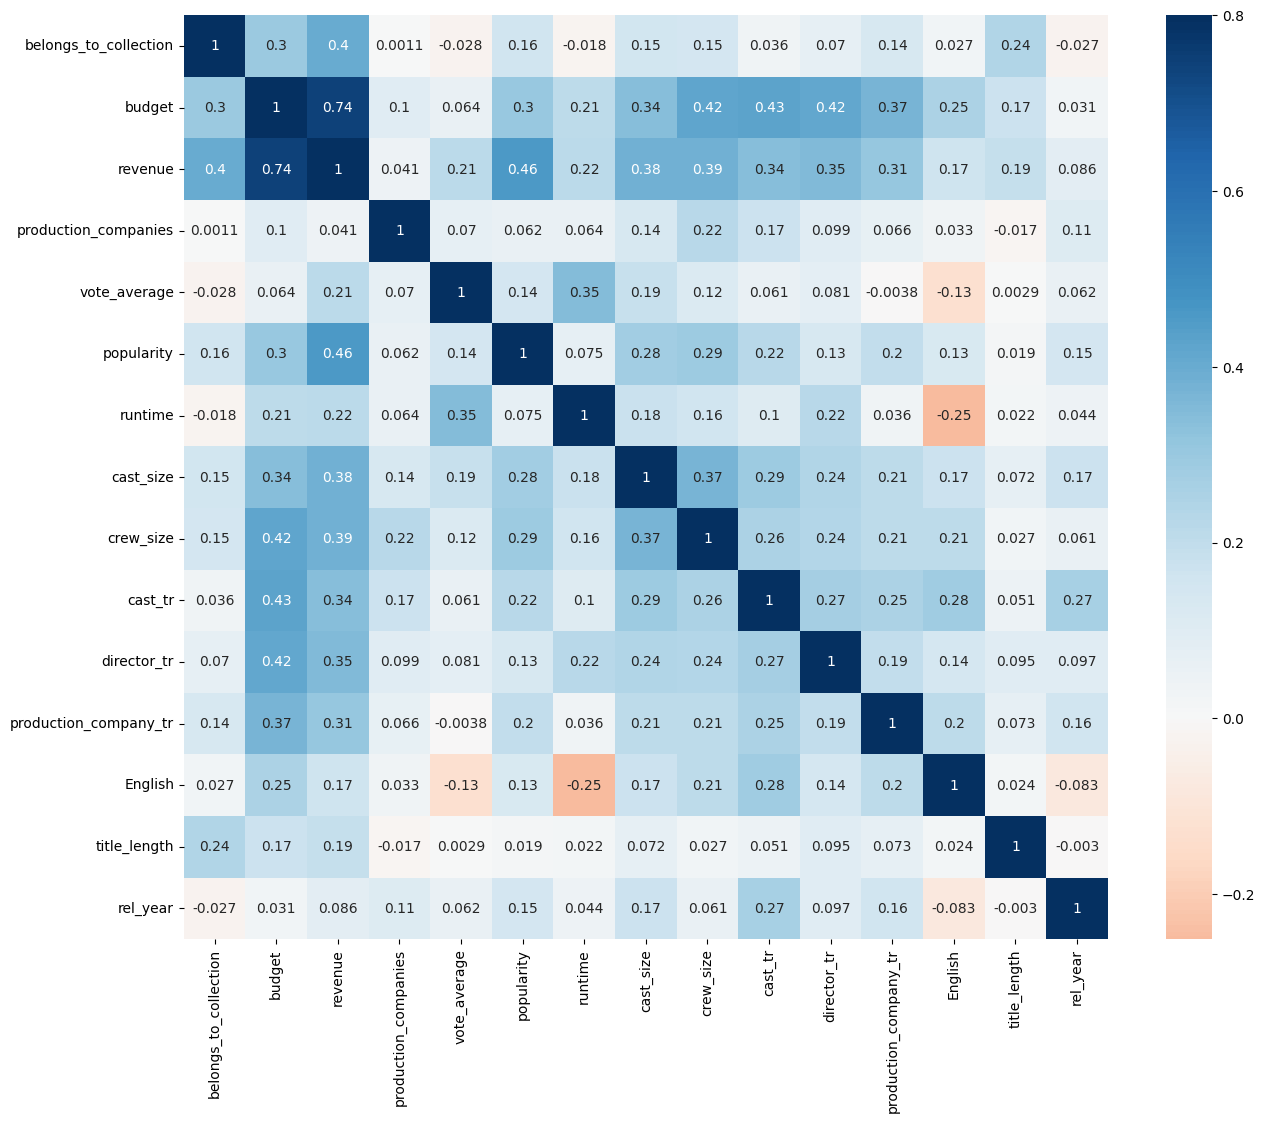

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, square=True, annot = True, cmap = "RdBu", center = 0, vmax = 0.8)
plt.show()

-> budget shows the strongest correlation with revenue.

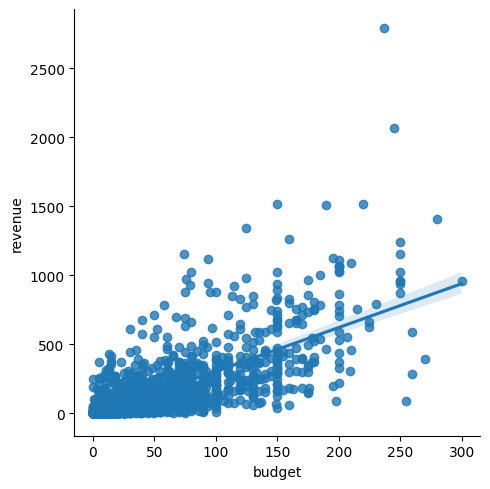

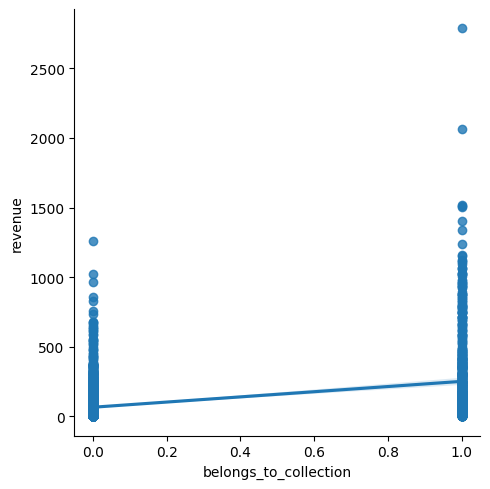

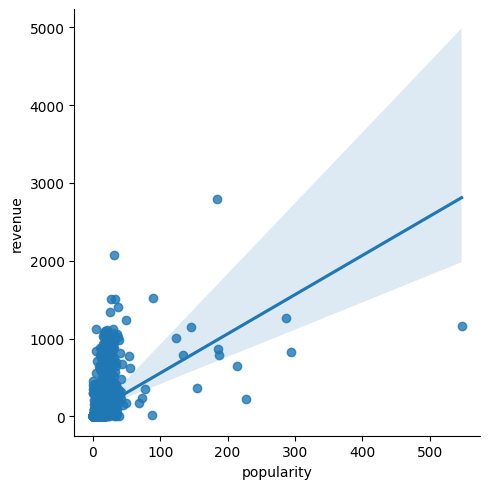

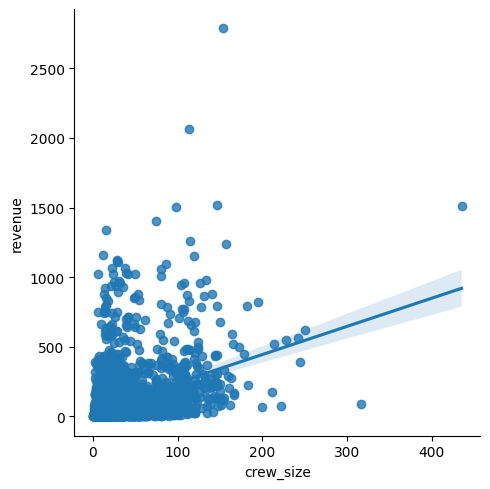

In [13]:
features = ["budget", "belongs_to_collection", "popularity", "crew_size"]
for i in features:
    sns.lmplot(x = i, y = "revenue", data = train_set)
    plt.show()

### Task 4:  Perform an Explanatory Data Analysis (EDA) - Categorical Data

In [14]:
categoricals = train_set.select_dtypes(exclude=np.number).columns.tolist()
categoricals

['main_genre', 'belongs_to_collection', 'English', 'rel_month']

In [15]:
categoricals.append("rel_year")

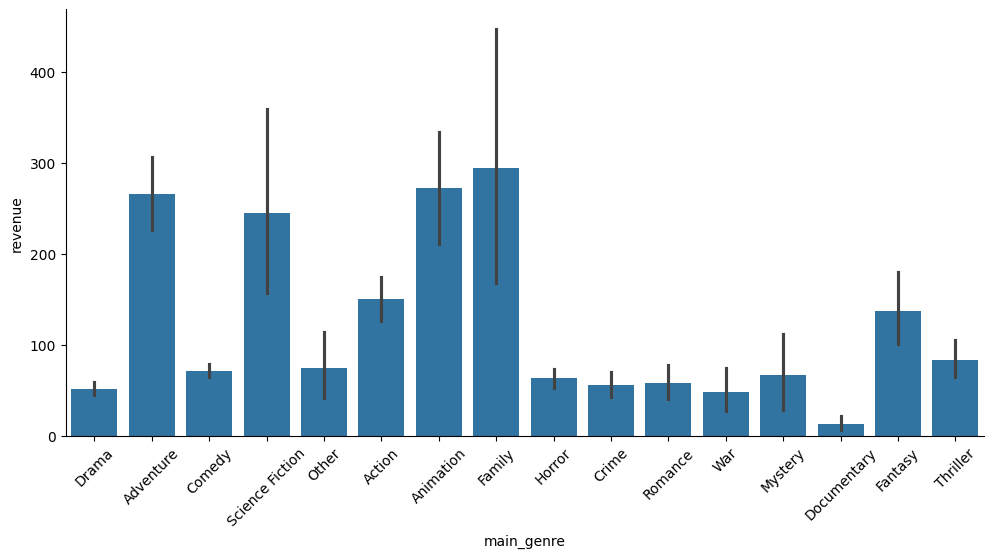

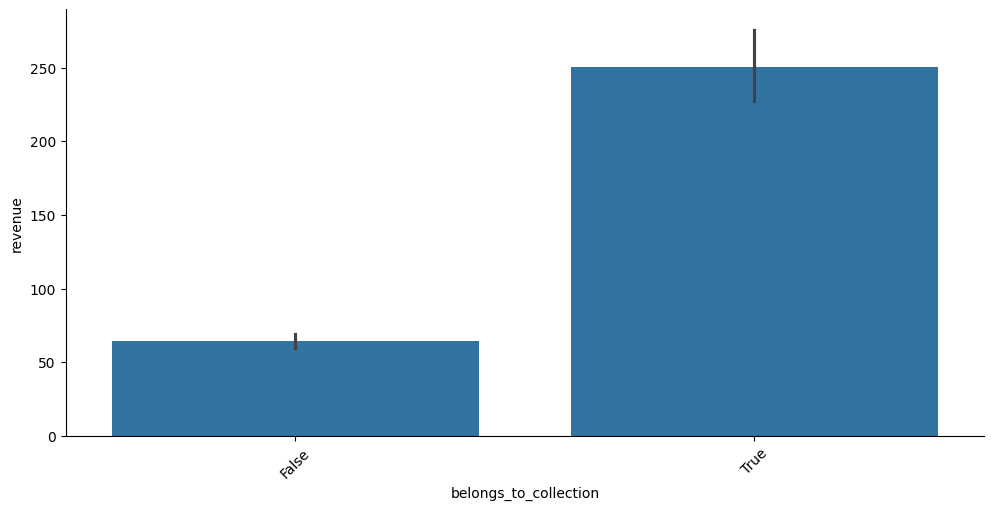

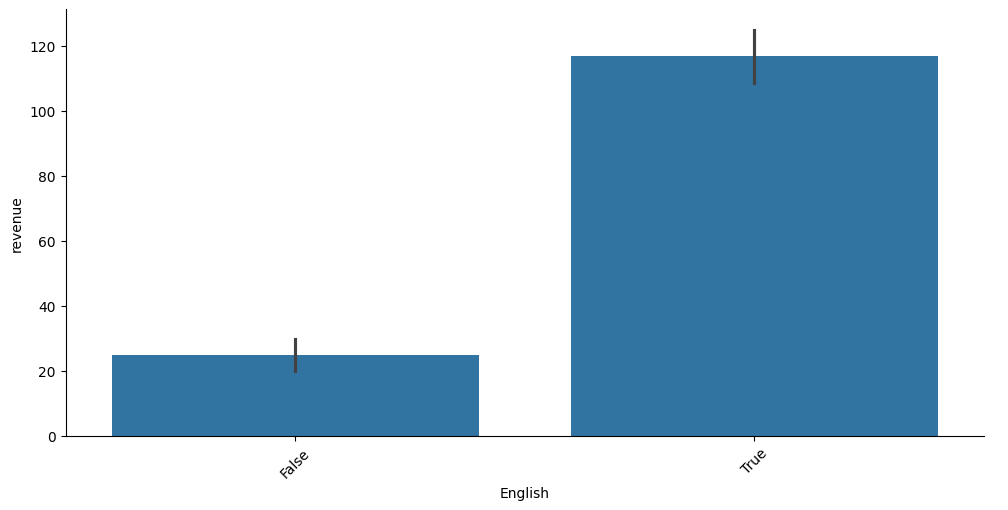

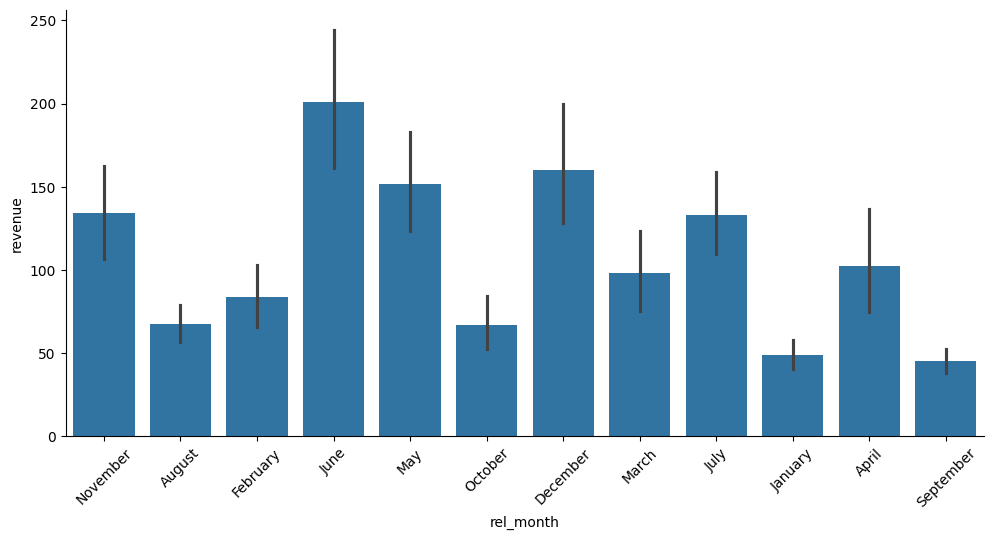

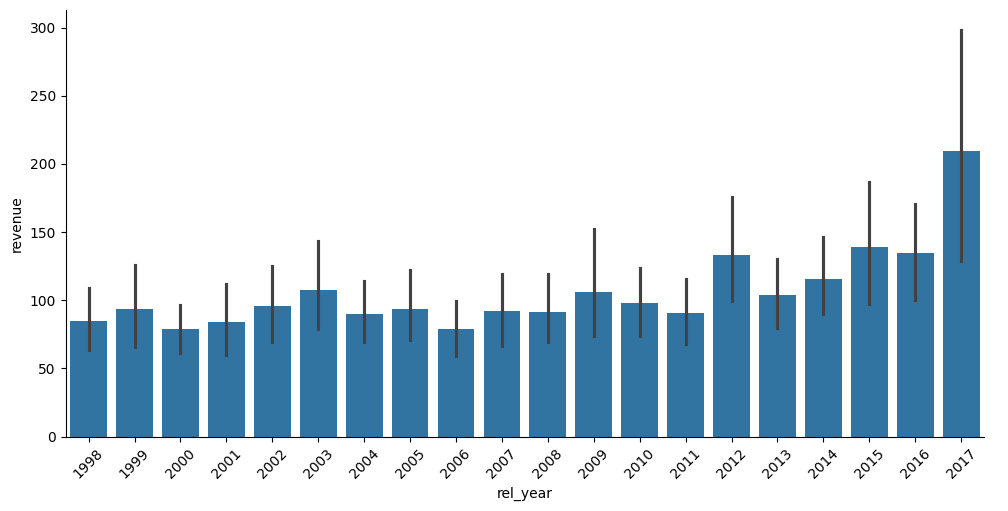

In [16]:
for cat in categoricals:
    sns.catplot(x = cat, y = "revenue", data = train_set, kind = "bar", aspect = 2)
    plt.xticks(rotation=45)
    plt.show()

### Task 5: Prepare the Data for Data Preprocessing

In [17]:
target = "revenue"

In [18]:
features = train_set.drop(columns = [target]).columns.to_list()
features

['main_genre',
 'belongs_to_collection',
 'budget',
 'production_companies',
 'vote_average',
 'popularity',
 'runtime',
 'cast_size',
 'crew_size',
 'cast_tr',
 'director_tr',
 'production_company_tr',
 'English',
 'title_length',
 'rel_year',
 'rel_month']

In [19]:
X_train = train_set[features].copy()
y_train = train_set[target].copy()
X_test = test_set[features].copy()
y_test = test_set[target].copy()

In [20]:
numeric_feat = list(X_train.select_dtypes(include = np.number).columns)
numeric_feat

['budget',
 'production_companies',
 'vote_average',
 'popularity',
 'runtime',
 'cast_size',
 'crew_size',
 'cast_tr',
 'director_tr',
 'production_company_tr',
 'title_length',
 'rel_year']

In [21]:
text_feat = list(X_train.select_dtypes(include = "object").columns)
text_feat

['main_genre', 'rel_month']

### Task 6: Create a Data Preprocessing Pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", RobustScaler())
])

In [24]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder())
])

In [25]:
preprocessor = ColumnTransformer(transformers=
                                 [('num',num_pipeline, numeric_feat),
                                  ('cat', cat_pipeline, text_feat)
                                 ], remainder = "passthrough"
                                )

In [26]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['budget', 'production_companies',
                                  'vote_average', 'popularity', 'runtime',
                                  'cast_size', 'crew_size', 'cast_tr',
                                  'director_tr', 'production_company_tr',
                                  'title_length', 'rel_year']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['main_genre', 'rel_month'])])

### Task 7: Initialize an XGBoost Regression Model and create the Regression Pipeline

In [27]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state = 42, tree_method = "hist")

In [28]:
regressor = Pipeline(steps=
                     [("preprocessor", preprocessor),
                      ("model", model)
                     ])

In [29]:
regressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['budget',
                                                   'production_companies',
                                                   'vote_average', 'popularity',
                                                   'runtime', 'cast_size',
                                                   'crew_size', 'cast_tr',
                                                   'director_tr',
                                                   'production_company_tr',
                                                   'title_length',
                                                   'rel_yea...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [30]:
regressor.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', RobustScaler())]),
                                    ['budget', 'production_companies',
                                     'vote_average', 'popularity', 'runtime',
                                     'cast_size', 'crew_size', 'cast_tr',
                                     'director_tr', 'production_company_tr',
                                     'title_length', 'rel_year']),
                                   ('cat',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',

### Task 8: Perform Hyperparameter Tuning using Cross Validation

In [31]:
param_grid = [{"model__max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
               "model__n_estimators": [100, 150, 200],
               "model__learning_rate": [0.01, 0.03, 0.05, 0.07, 0.09, 0.11],
               "model__colsample_bytree": [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
               "model__subsample": [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
               "model__min_child_weight": [1, 3, 5, 7, 9, 11, 13],
               "model__gamma": [0, 1, 2, 3, 4, 5],
               "model__reg_alpha": [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
               "model__reg_lambda": [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              }]

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
n_iter = 60
n_jobs = -1
scores = ["neg_root_mean_squared_error", "r2"]
refit = "neg_root_mean_squared_error"
random_state = 42

In [34]:
rscv = RandomizedSearchCV(estimator = regressor,
                          param_distributions = param_grid,
                          n_iter = n_iter,
                          n_jobs = n_jobs,
                          scoring = scores,
                          refit = refit,
                          random_state = random_state)

In [35]:
rscv.fit(X = X_train, y = y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['budget',
                                                                                'production_companies',
                                                                                'vote_average',
                                                                                'popularity',
                                                                                'runtime',
                                                                                'cast_size',
                                                                                'crew_size',
                                                                                'cast_tr',
                                                                                'director_tr',
                                                                                'production_compan...
                                         'model__max_depth': [3, 4, 5, 6, 7, 8,
                                                              9, 10],
                                         'model__min_child_weight': [1, 3, 5, 7,
                                                                     9, 11,
                                                                     13],
                                         'model__n_estimators': [100, 150, 200],
                                         'model__reg_alpha': [0, 0.1, 0.3, 0.5,
                                                              0.7, 0.9, 1],
                                         'model__reg_lambda': [0, 0.1, 0.3, 0.5,
                                                               0.7, 0.9, 1],
                                         'model__subsample': [0.3, 0.5, 0.6,
                                                              0.7, 0.8, 0.9,
                                                              1]}],
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error', 'r2'])

### Task 9: Evaluate Cross Validation and select the best Model

In [38]:
rscv.best_score_

np.float64(-95.32074186034656)

In [37]:
cv_results = pd.DataFrame(rscv.cv_results_)[["params",
                                            "mean_test_neg_root_mean_squared_error",
                                            "mean_test_r2",
                                            "rank_test_neg_root_mean_squared_error",
                                            "rank_test_r2"]]

In [39]:
cv_results = cv_results.sort_values("mean_test_neg_root_mean_squared_error", ascending=False)
cv_results

,params,mean_test_neg_root_mean_squared_error,mean_test_r2,rank_test_neg_root_mean_squared_error,rank_test_r2
24,"{'model__subsample': 0.9, 'model__reg_lambda':...",-95.320742,0.748454,1,2
33,"{'model__subsample': 0.6, 'model__reg_lambda':...",-95.337598,0.748893,2,1
7,"{'model__subsample': 1, 'model__reg_lambda': 0...",-95.486672,0.747460,3,3
52,"{'model__subsample': 1, 'model__reg_lambda': 0...",-96.179999,0.744072,4,4
34,"{'model__subsample': 0.3, 'model__reg_lambda':...",-96.289290,0.743485,5,5
32,"{'model__subsample': 0.9, 'model__reg_lambda':...",-96.293978,0.743382,6,6
43,"{'model__subsample': 0.9, 'model__reg_lambda':...",-96.381390,0.742663,7,7
19,"{'model__subsample': 0.7, 'model__reg_lambda':...",-96.946857,0.739872,8,8
56,"{'model__subsample': 0.8, 'model__reg_lambda':...",-96.980194,0.738830,9,9
36,"{'model__subsample': 1, 'model__reg_lambda': 0...",-97.126262,0.738076,10,13


In [40]:
rscv.best_estimator_[1]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Task 10: Evaluate model performance on the Testset

In [41]:
pred = rscv.predict(X_test)
pred

array([ 7.87849522e+00,  2.30112000e+01,  1.14731216e+02,  1.80328827e+01,
        4.83719368e+01,  3.82815430e+02,  2.04959030e+01,  1.52890915e+02,
        8.23425293e+00,  1.24379707e+02,  1.14274464e+01,  1.06509178e+02,
        7.91701431e+01,  1.72474487e+02,  1.12418060e+02,  1.94379013e+02,
        2.55225708e+02,  6.55000992e+01,  3.39245575e+02,  3.71357422e+01,
        1.62168121e+02,  3.96938599e+02,  6.61129684e+01,  3.04531574e+01,
        5.44032669e+00,  3.21398254e+02,  9.81920052e+00,  4.73485107e+01,
        1.03727173e+03,  1.09630613e+01,  2.04476852e+01,  1.74268837e+01,
        1.86734257e+01,  3.61110687e+01,  2.45624142e+01,  1.93710060e+01,
        3.58217049e+01,  1.06445518e+02,  4.33972054e+01,  9.83738251e+01,
        2.08462620e+01,  2.46298523e+02,  1.44378601e+02,  4.04880714e+01,
        6.37405739e+01,  3.93005600e+01,  1.94786392e+02,  1.03269722e+02,
        7.44808960e+01,  1.08299980e+02,  1.86311417e+01,  1.90451920e+02,
        1.37930756e+01,  

In [45]:
from sklearn import metrics

In [51]:
metrics.mean_squared_error(y_true = y_test, y_pred = pred)

8124.898923299389

In [52]:
metrics.r2_score(y_true = y_test, y_pred = pred)

0.7204256168592404

-> RMSE score better, R-squared score slightly worse